# Predicting heart disease using machine learning

**Objective:** To build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


**Approach:**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original Heart Disease Dataset comes from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/45/heart+disease

Another Heart Disease Classification Dataset version from Kaggle:
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> Reach 95% of accuracy at predicting whether or not a patient has heart disease.

## 4. Features

**Data Dictionary**

* **age:** Displays the age of the individual.


* **sex:**
    * 1 = male
    * 0 = female


* **cp** - Chest-pain type: displays the type of chest-pain experienced by the individual
    * 0 = typical angina
    * 1 = atypical angina
    * 2 = non — anginal pain (non-heart related)
    * 3 = asymptotic


* **trestbps** - Resting Blood Pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.


* **chol** - Serum cholestoral in mg/dl.
    * Serum = LDL + HDL + .2 * triglycerides
    * Above 200 is cause for concern


* **fbs** - Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    * 1 (true)
    * 0 (false)
    * '>126' mg/dL signals diabetes


* **restecg** - Resting electrocardiographic results.
    * 0 = normal 
    * 1 = having ST-T wave abnormality
    * 2 = left ventricular hyperthrophy


* **thalach** - Maximum heart rate achieved.


* **exang** - Exercise induced angina.
    * 1 = yes
    * 0 = no


* **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more.


* **slope** - The slope of the peak exercise ST segment
    * 0 = upsloping: better heart rate with excercise (uncommon)
    * 1 = flat: minimal change (typical healthy heart)
    * 2 = downsloping: signs of unhealthy heart


* **ca** - Number of major vessels (0–3) colored by flourosopy.
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)


* **thal**: Displays the thalassemia
    * 1,3 = normal
    * 6 = fixed defect
    * 7 = reversible defect: no proper blood movement when excercising


* **target**: Displays whether the individual is suffering from heart disease or not.
    * 1 = yes
    * 0 = no

## Set the stage

Import libraries:

* `pandas`: Used for data manipulation.
* `matplotlib.pyplot`: Used for plotting data.
* `numpy`: Performs mathematical operations on large arrays of matrices.
* `seaborn`: Data visualization library (statistical graphics) based on matplotlib.
* `%matplotlib inline`: The plots to appear inside the notebook.

In [3]:
# Regular EDA and plotting libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load the data

In [6]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

303 rows, and 14 columns

## Exploratory Data Analysis


1. What kind of data do we have and how do we treat different types?
2. What's missing from the data? - how do we deal with it?
3. Where are the outliers?
4. How to add, change or remove features to get more of the data?

In [8]:
# How many of each class from the target column?
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* 165 patients with heart disease.
* 138 examples of patiens who doesn't have heart disease.

This is a balanced classification problem - we have similar amount of examples in both classess.

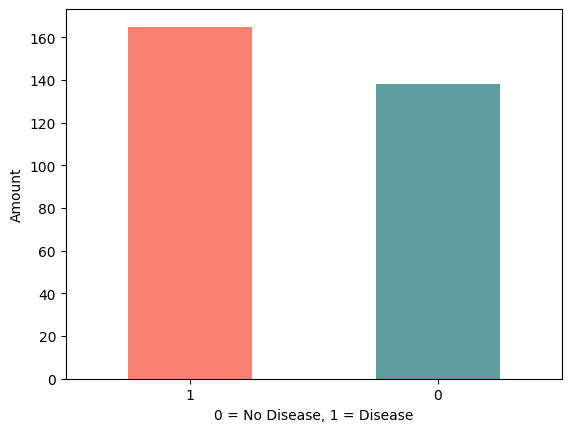

In [23]:
df["target"].value_counts().plot(kind="bar",
                                 color=["salmon", "cadetblue"]);

plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [10]:
# Get a quick insight into the number of missing values and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Show a range of metrics from the numerical columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing Features:
### Heart Disease Frequency - According to Sex

sex:
* 1 = male
* 0 = female

In [14]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
# Compare sex column vs target column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


* Based on the existing data, 75% of probability women have had heart disease.
* Based on the existing data, 44% of probability men have had heart disease.

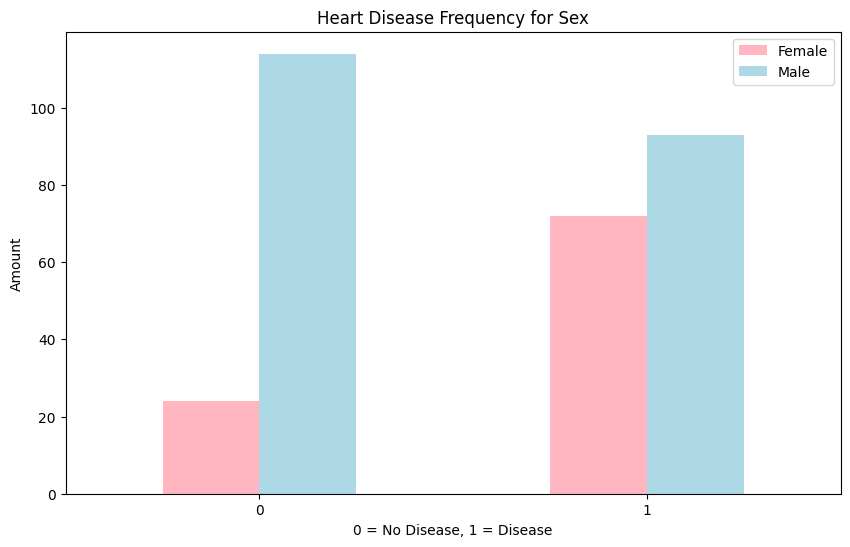

In [20]:
# Create a plot of the comparation
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["lightpink", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Comparing Features:
### Age vs. Max Heart Rate for Heart Disease

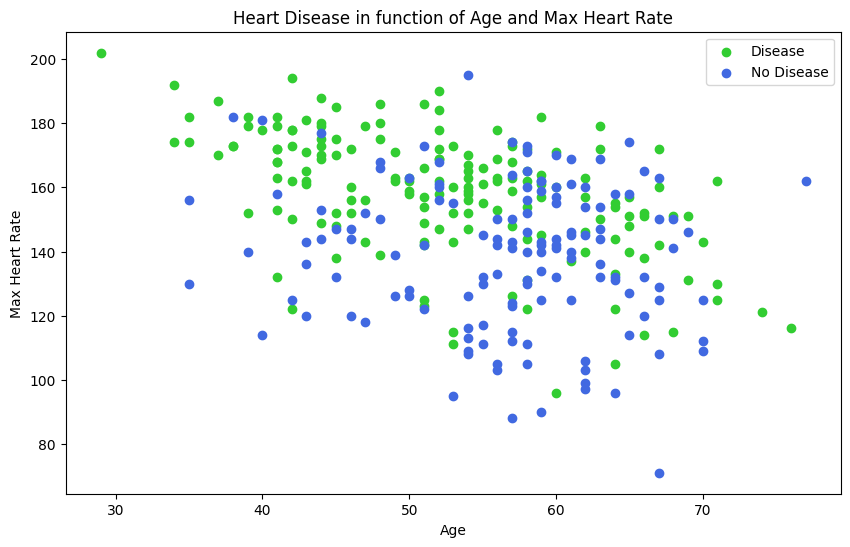

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot - only positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="limegreen");

# Scatter plot - only negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c="royalblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

The younger someone is, the higher their max heart rate (the dots are higher on the left of the graph).

There may be more heart disease in the younger population too (more green dots).

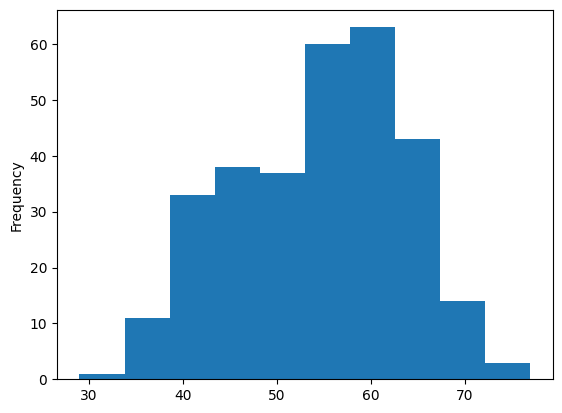

In [36]:
# Distribution of the age column with a histogram

df["age"].plot.hist();

It is a **normal distribution**, but **slightly swaying to the right** - it reflects in the scatter plot above.

### Heart Disease Frequency per Chest Pain type

cp - Chest-pain type: displays the type of chest-pain experienced by the individual
* 0 = Typical angina: chest pain related decrease blood supply to the heart
* 1 = Atypical angina: chest pain not related to heart
* 2 = Non-anginal pain: typically esophageal spasms (non heart related)
* 3 = Asymptomatic: chest pain not showing signs of disease

In [33]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


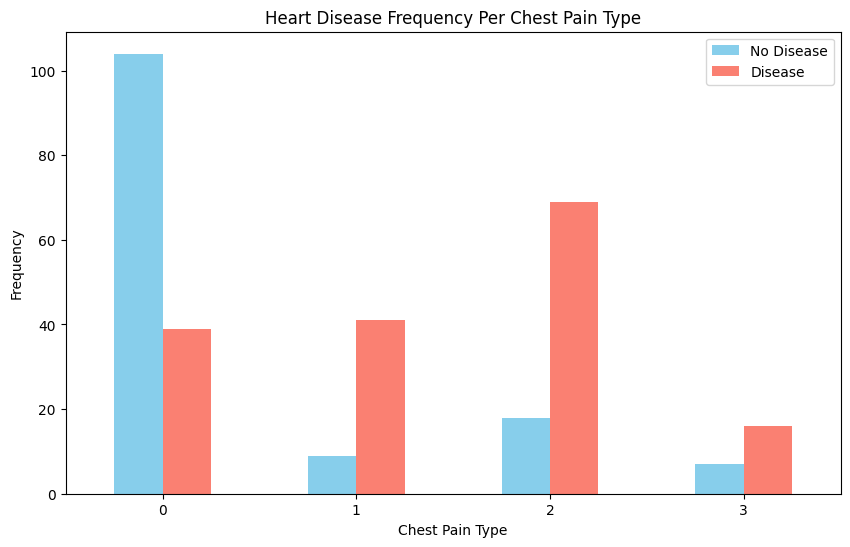

In [35]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                        figsize=(10, 6),
                                        color=["skyblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

It seems atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.